In [1]:
from pystan import StanModel
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
d = pd.read_csv('data-salary.txt')
data = d.to_dict('list')
data['N'] = len(d)
data;

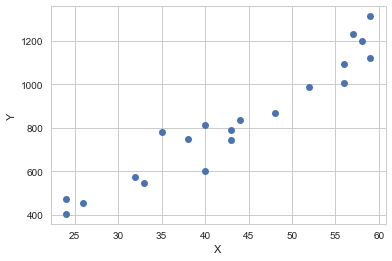

In [5]:
plt.plot(d['X'], data['Y'], 'o')
plt.xlabel('X')
plt.ylabel('Y');

coef= 21.904201433
intercept= -119.697132121


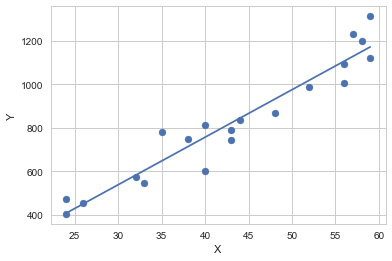

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(d['X'][:, np.newaxis], d['Y'])
yfit = model.predict(d['X'][:, np.newaxis])
plt.scatter(d['X'], data['Y'])
plt.plot(d['X'], yfit)
print('coef=',model.coef_[0])
print('intercept=',model.intercept_)
plt.xlabel('X')
plt.ylabel('Y');

In [7]:
stanmodel = StanModel(file='model4-5.stan')

In [8]:
fit = stanmodel.sampling(data=data, seed= 123, iter=2000, warmup=300, n_jobs=-1)

In [9]:
fit

Inference for Stan model: anon_model_787064849111021a4d227da3d9bb4633.
4 chains, each with iter=2000; warmup=300; thin=1; 
post-warmup draws per chain=1700, total post-warmup draws=6800.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -117.8    1.43   73.4 -266.8 -166.0 -117.8 -70.08  32.21   2626    1.0
b      21.86    0.03   1.63  18.56  20.82  21.86  22.93  25.11   2631    1.0
sigma  84.93    0.31  15.55  60.66   73.9  82.89  93.58 121.61   2594    1.0
lp__  -93.62    0.03   1.28 -96.94 -94.22 -93.28  -92.7 -92.16   2069    1.0

Samples were drawn using NUTS at Wed Apr 19 01:19:23 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [64]:
from scipy.stats import gaussian_kde
def find_map(data):
    kde = gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 501)
    eval_kde = kde.evaluate(x_range)
    return x_range[np.argmax(eval_kde)]

In [10]:
def stanfit_to_dataframe(fit):
    summary = fit.summary()
    columns = summary['summary_colnames']
    index = summary['summary_rownames']
    data = summary['summary']
    return pd.DataFrame(data, index, columns)

In [70]:
map_a = find_map(fit['a'])
map_b = find_map(fit['b'])
map_sigma = find_map(fit['sigma'])
map_lp__  = find_map(fit['lp__'])

In [71]:
fitdf = stanfit_to_dataframe(fit)
fitdf['map'] = [map_a, map_b, map_sigma, map_lp__]
fitdf

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat,map
a,-117.866074,1.432376,73.401391,-266.858376,-166.087705,-117.833252,-70.079185,32.213691,2626.0,1.002662,-112.666352
b,21.862427,0.031707,1.626356,18.560937,20.816842,21.857257,22.931271,25.107403,2631.0,1.002287,21.565318
sigma,84.928436,0.305248,15.546699,60.659353,73.901546,82.894719,93.582312,121.614225,2594.0,1.000465,80.646450
lp__,-93.624156,0.028222,1.283702,-96.936052,-94.215034,-93.277948,-92.698320,-92.158788,2069.0,1.000643,-92.749325


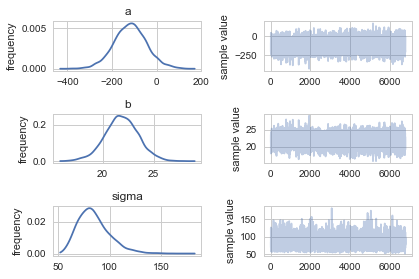

In [13]:
fit.traceplot().tight_layout()

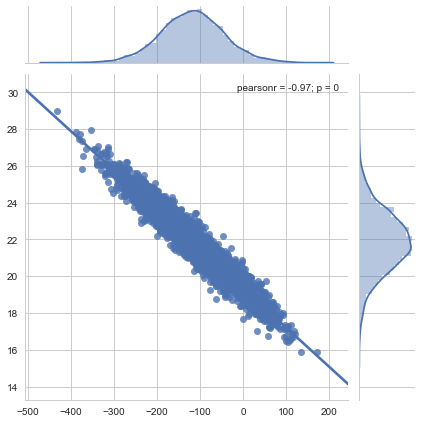

In [39]:
sns.jointplot(x=fit['a'],  y=fit['b'], kind='reg');

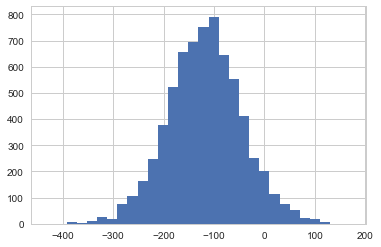

In [22]:
plt.hist(fit['a'], bins=30)
plt.show()

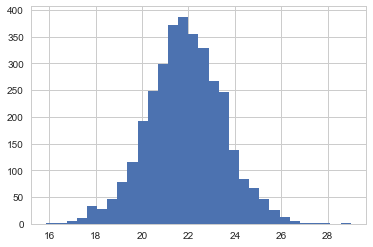

In [114]:
plt.hist(fit_nuts_2['b'], bins=30)
plt.show()

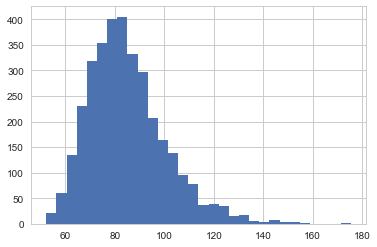

In [115]:
plt.hist(fit_nuts_2['sigma'], bins=30)
plt.show()

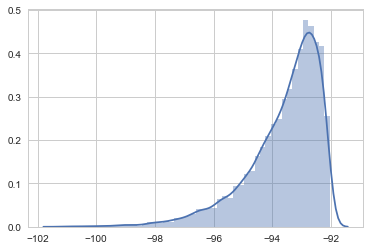

In [42]:
sns.distplot(fit['lp__']);